### Joshua Hawley - Wrangle and Analyze Data Project

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import tweepy as tw
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Table of Contents

<ul>
<li><a href="#gathering_data">Gathering Data</a>
<li><a href="#assessing_data">Assessing Data</a></li>
<ul>
<li><a href="#assessing_tw_archive">assessing tw_archive</a></li>
<li><a href="#image_predictions">assessing image_predictions</a></li>
<li><a href="#tw_api">assessing tw_api</a></li>
</ul>
<li><a href="#data_issues">Data Issues</a></li>
<li><a href="#cleaning_data">Cleaning Data</a></li>
<li><a href="#visualizations">Visualizations and Insights</a></li>
</ul>

<a id='gathering_data'></a>
### Gathering Data

In [2]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# image_predictions.tsv download from provided URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions =  pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
twitter_app = pd.read_csv('twitter_API.csv')

In [6]:
API_key = twitter_app['Token'].values[0]
API_secret = twitter_app['Token'].values[1]
access_token = twitter_app['Token'].values[3]
access_token_secret = twitter_app['Token'].values[4]

auth = tw.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit = True)

errors=[]
with open ('tweet_json.txt', 'w') as file:
    for tweet_id in tw_archive['tweet_id']:
        try:
            status = api.get_status(tweet_id)
            json.dump(status._json, file)
            file.write('\n')
        except Exception as e:
            print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
            errors.append(tweet_id)

Error on tweet id 888202515573088257;404 Not Found
144 - No status found with that ID.
Error on tweet id 873697596434513921;404 Not Found
144 - No status found with that ID.
Error on tweet id 872668790621863937;404 Not Found
144 - No status found with that ID.
Error on tweet id 872261713294495745;404 Not Found
144 - No status found with that ID.
Error on tweet id 869988702071779329;404 Not Found
144 - No status found with that ID.
Error on tweet id 866816280283807744;404 Not Found
144 - No status found with that ID.
Error on tweet id 861769973181624320;404 Not Found
144 - No status found with that ID.
Error on tweet id 856602993587888130;404 Not Found
144 - No status found with that ID.
Error on tweet id 856330835276025856;404 Not Found
34 - Sorry, that page does not exist.
Error on tweet id 851953902622658560;404 Not Found
144 - No status found with that ID.
Error on tweet id 851861385021730816;404 Not Found
34 - Sorry, that page does not exist.
Error on tweet id 845459076796616705;40

Rate limit reached. Sleeping for: 716


Error on tweet id 754011816964026368;404 Not Found
144 - No status found with that ID.
Error on tweet id 680055455951884288;404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 716


In [7]:
tw_list = []
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweet=json.loads(line)
        tw_list.append(tweet)

tw_api = pd.DataFrame(tw_list)

<a id='assessing_data'></a>
## Assessing Data

<a id='assessing_tw_archive'></a>
### Assessing the tw_archive dataframe

In [8]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
tw_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
tw_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
tw_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
tw_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

<a id='image_predictions'></a>
## Assessing the image_predictions dataframe

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

<a id='tw_api'></a>
## Assessing the tw_api dataframe

In [19]:
tw_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   text                           2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   entities                       2327 non-null   object 
 6   extended_entities              1814 non-null   object 
 7   source                         2327 non-null   object 
 8   in_reply_to_status_id          77 non-null     float64
 9   in_reply_to_status_id_str      77 non-null     object 
 10  in_reply_to_user_id            77 non-null     float64
 11  in_reply_to_user_id_str        77 non-null     object 
 12  in_reply_to_screen_name        77 non-null     o

In [20]:
tw_api.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,34204,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,29664,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,22333,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,37347,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,35701,False,False,False,False,en,NaN,NaN,NaN,NaN


In [21]:
tw_api.isnull().sum()

created_at                          0
id                                  0
id_str                              0
text                                0
truncated                           0
entities                            0
extended_entities                 513
source                              0
in_reply_to_status_id            2250
in_reply_to_status_id_str        2250
in_reply_to_user_id              2250
in_reply_to_user_id_str          2250
in_reply_to_screen_name          2250
user                                0
geo                              2327
coordinates                      2327
place                            2326
contributors                     2327
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sensitive_appealable     132
lang                                0
retweeted_st

<a id='data_issues'></a>
## Data Issues

#### Data Tidiness Issues

- [x] tw_archive: Stages should be merged from 4 columns to 1.
- [x] tw_api: 'id' should be renamed to to 'tweet_id' for consistency
- [x] tw_api: Only 3 columns needed for tw_api ( 'tweet_id',' retweet_count', 'favorite_count')
- [x] image_predictions: Columns 'p1', p1_dog', p1_conf', 'p2', p2_dog', p2_conf', 'p3', p3_dog', p3_conf') can be combined to just 'dog' and 'confidence'
- [x] The dataframes should be merged into one dataframe. The use of all three is inefficient 

#### Data Quality Issues

- [x] Breed names are in different formats ex: toy_poodle, Malamute
- [x] tw_archive: Values in stages showing as 'None' instead of 'Nan'
- [x] Columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are of the wrong datatype
- [x] Columns 'timestamp','retweeted_status_timestamp' should be datetime
- [x] rating_numerator is the wrong data type
- [x] Values in stage columns that are missing should read NaN instead of None
- [x] Ratings denominators should all be 10 and non-realistic numerators should be removed.
- [x] Invalid entries in name column. 'None' and 'a' are the top two value count items.


<a id='cleaning_data'></a>
## Cleaning Data

In [23]:
# copying original dataframes for cleaning


tw_archive_clean = tw_archive.copy()
image_predictions_clean = image_predictions.copy()
tw_api_clean = tw_api.copy()

tw_archive_clean = tw_archive_clean[tw_archive_clean.retweeted_status_id.isnull()]
tw_archive_clean = tw_archive_clean[tw_archive_clean.retweeted_status_user_id.isnull()]
tw_archive_clean = tw_archive_clean[tw_archive_clean.retweeted_status_timestamp.isnull()]

### Tidiness

I want to address tidiness first in order to make things a little easier later on. 

#### Define

Merging Dog Stages from 4 columns down to a single column. This is not a huge issue, but it is much more efficient where only one selection is available per tweet record. This also has the advantage of fixing the quality issue where missing values show as 'None' instead of NaN.

#### Code

In [24]:
# Extracting the text from the columns and creating new 'dog_stage' column
tw_archive_clean['dog_stage'] = tw_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Dropping the now redundant columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']
tw_archive_clean = tw_archive_clean.drop(columns, axis=1)

#### Test

In [25]:
tw_archive_clean['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [26]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Define

Changing the column name on the tw_api dataframe from 'id' to 'tweet_id' and dropping all but 'tweet_id', 'retweet_count', 'favorite_count'. 

#### Code

In [27]:
# Changing 'id' to 'tweet_id' for later concatenation

tw_api_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [28]:
tw_api_clean.head()

,created_at,tweet_id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,34204,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,29664,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,22333,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,37347,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,35701,False,False,False,False,en,NaN,NaN,NaN,NaN


#### Define

The tw_api_clean dataframe has quite a bit of extraneous information. It can be simplified to the three collumns: 'tweet_id', 'retweet_count', and 'favorite_count'. There are other columns that will be used, but those are contained within the other dataframes and we will be merging them later on.

#### Code

In [29]:
tw_api_clean = tw_api_clean[['tweet_id', 'retweet_count', 'favorite_count']]

#### Test

In [30]:
tw_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
tw_api_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7099,34204
1,892177421306343426,5350,29664
2,891815181378084864,3520,22333
3,891689557279858688,7294,37347
4,891327558926688256,7844,35701


#### Define

The separate breed and confidence columns can and should be merged into two columns with the highest confidence( 'breed', 'confidence').

#### Code

In [32]:
# Create breed and confidence columns with highest confidence predictions and drop other columns
breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in image_predictions_clean.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
image_predictions_clean['breed'] = breed
image_predictions_clean['confidence'] = confidence



#### Test

In [33]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


#### Define

Having three separate dataframes seems a little redundant. Merging them all together ti make things ckeaner for visualization.

#### Code

In [34]:
tw_archive_clean = pd.merge(tw_archive_clean, image_predictions_clean, how='left', on='tweet_id')
tw_archive_clean = pd.merge(tw_archive_clean, tw_api_clean, how='left', on='tweet_id')

#### Test

In [35]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,7099.0,34204.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581,5350.0,29664.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012,3520.0,22333.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN,7294.0,37347.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712,7844.0,35701.0


In [36]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

### Quality

#### Define

The breed names are inconcistently represented. I'm going to title case the names and remove the underscores to make charting look cleaner.

#### Code

In [37]:
tw_archive_clean['breed'] = tw_archive_clean['breed'].str.replace('_', ' ')

tw_archive_clean['breed'] = tw_archive_clean['breed'].str.title()

#### Test

In [38]:
tw_archive_clean['breed'].value_counts()

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
                     ... 
Scotch Terrier          1
Entlebucher             1
Japanese Spaniel        1
Standard Schnauzer      1
Clumber                 1
Name: breed, Length: 111, dtype: int64

In [39]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,7099.0,34204.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581,5350.0,29664.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012,3520.0,22333.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN,7294.0,37347.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Basset,0.555712,7844.0,35701.0


#### Define

Values in the dog_stage column showing missing values as 'None' instead of NaN. This was resolved earlier when created a single column for dg_stage.

#### Code

None needed as the problem was resolved in an earlier change.

#### Test

In [40]:
tw_archive_clean['dog_stage'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_stage, dtype: object

In [41]:
tw_archive_clean['dog_stage'].isnull().sum()

1811

#### Define

Columns 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are of the wrong datatype. Converting to str type.

#### Code

In [42]:
# Converting the columns from incorrect type to str

tw_archive_clean.tweet_id = tw_archive_clean.tweet_id.astype('str')

tw_archive_clean.in_reply_to_status_id = tw_archive_clean.in_reply_to_status_id.astype('str')

tw_archive_clean.in_reply_to_user_id = tw_archive_clean.in_reply_to_user_id.astype('str')

tw_archive_clean.retweeted_status_id = tw_archive_clean.retweeted_status_id.astype('str')

tw_archive_clean.retweeted_status_user_id = tw_archive_clean.retweeted_status_user_id.astype('str')

#### Test

In [43]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       2175 non-null   object 
 2   in_reply_to_user_id         2175 non-null   object 
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         2175 non-null   object 
 7   retweeted_status_user_id    2175 non-null   object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [44]:
tw_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,retweet_count,favorite_count
2170,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,...,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311,37.0,91.0
2171,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian Ridgeback,0.408143,117.0,250.0
2172,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,...,malinois,0.138584,True,bloodhound,0.116197,True,German Shepherd,0.596461,36.0,101.0
2173,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,0.506826,39.0,115.0
2174,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888...,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074,427.0,2316.0


#### Define

Columns 'timestamp','retweeted_status_timestamp' should be datetime. Converting from current, incorrect format to datetime.

#### Code

In [45]:
# Changing the format to timestamp for accuracy and ease of later visualization

tw_archive_clean.timestamp = pd.to_datetime(tw_archive_clean.timestamp)

tw_archive_clean.retweeted_status_timestamp = pd.to_datetime(tw_archive_clean.retweeted_status_timestamp)

#### Test

In [46]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       2175 non-null   object             
 2   in_reply_to_user_id         2175 non-null   object             
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         2175 non-null   object             
 7   retweeted_status_user_id    2175 non-null   object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Define

Change numerator format from int to float. Denominator should remain an int, but there are going to be variations on the numerators.

#### Code

In [47]:
tw_archive_clean.rating_numerator = tw_archive_clean.rating_numerator.astype('float')

#### Test

In [48]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       2175 non-null   object             
 2   in_reply_to_user_id         2175 non-null   object             
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         2175 non-null   object             
 7   retweeted_status_user_id    2175 non-null   object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

#### Define

While @dogrates has a unique grading system that frequently (and rightly so, due to the goodness of the dogs being rated) results in ratings with a fraction greater than 1, there are some numerators that are well outside the range of acceptability. This also holds true for some denominators. This also clears out any extraneous denomoinators, leaving all ratings */10.

#### Code

In [49]:
tw_archive_clean.rating_numerator.value_counts(), tw_archive_clean.rating_denominator.value_counts()


(12.0      500
 10.0      442
 11.0      426
 13.0      307
 9.0       156
 8.0        98
 7.0        54
 14.0       43
 5.0        36
 6.0        32
 3.0        19
 4.0        17
 2.0         9
 1.0         8
 420.0       2
 0.0         2
 17.0        1
 45.0        1
 60.0        1
 143.0       1
 44.0        1
 99.0        1
 121.0       1
 20.0        1
 26.0        1
 144.0       1
 80.0        1
 165.0       1
 50.0        1
 204.0       1
 1776.0      1
 27.0        1
 75.0        1
 24.0        1
 84.0        1
 960.0       1
 15.0        1
 182.0       1
 666.0       1
 88.0        1
 Name: rating_numerator, dtype: int64,
 10     2153
 50        3
 11        2
 20        2
 80        2
 15        1
 70        1
 7         1
 150       1
 170       1
 0         1
 90        1
 40        1
 130       1
 110       1
 16        1
 120       1
 2         1
 Name: rating_denominator, dtype: int64)

In [50]:
# Deleting with numerators or denominators that were used the dfewest times. 
# It's only 54 records so it shouldn't have an effect on the dataset

numerators = tw_archive_clean.rating_numerator.value_counts().loc[lambda x : x <= 3]
for numerator in numerators.index:
    tw_archive_clean.drop(tw_archive_clean.query('rating_numerator == ' + str(numerator)).index, inplace=True)
    
denominators = tw_archive_clean.rating_denominator.value_counts().loc[lambda x : x <= 3]
for denominator in denominators.index:
    tw_archive_clean.drop(tw_archive_clean.query('rating_denominator == ' + str(denominator)).index, inplace=True)
    

#### Test

In [51]:
tw_archive_clean.rating_numerator.value_counts(), tw_archive_clean.rating_denominator.value_counts()


(12.0    500
 10.0    442
 11.0    425
 13.0    307
 9.0     155
 8.0      98
 7.0      53
 14.0     43
 5.0      36
 6.0      32
 3.0      19
 4.0      15
 2.0       9
 1.0       7
 Name: rating_numerator, dtype: int64,
 10    2141
 Name: rating_denominator, dtype: int64)

In [52]:
tw_archive_clean.loc[:, ['rating_denominator', 'rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2141.0,2141.000000
mean,10.0,10.626810
std,0.0,2.170837
min,10.0,1.000000
25%,10.0,10.000000
50%,10.0,11.000000
75%,10.0,12.000000
max,10.0,14.000000


#### Define

Name column has invalid entries. 'None' and 'a' are two of the top items. These need to be removed or corrected.

#### Code

In [53]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2174
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2141 non-null   object             
 1   in_reply_to_status_id       2141 non-null   object             
 2   in_reply_to_user_id         2141 non-null   object             
 3   timestamp                   2141 non-null   datetime64[ns, UTC]
 4   source                      2141 non-null   object             
 5   text                        2141 non-null   object             
 6   retweeted_status_id         2141 non-null   object             
 7   retweeted_status_user_id    2141 non-null   object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2092 non-null   object             
 10  rating_numerator            2141 non-null   float64         

In [54]:
tw_archive_clean.name.value_counts()

None          655
a              54
Charlie        11
Lucy           11
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 952, dtype: int64

In [55]:
# Dropping rows with name value 'None'

tw_archive_clean.drop(tw_archive_clean[tw_archive_clean['name'] == 'None'].index, inplace = True)


In [56]:
# Dropping rows with name value 'a'

tw_archive_clean.drop(tw_archive_clean[tw_archive_clean['name'] == 'a'].index, inplace = True)


#### Test

In [57]:
tw_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 950, dtype: int64

In [58]:
tw_archive_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='visualizations'></a>
### Visualizations and Insights

#### Insights:
1. Charlie is the most popular dog name
2. Labrador Retriever is the most popular dog breed
3. Floofer has the most concentrated, highest rating, showing the least amount of variance by stage

#### Visualizations:

Popularity of Dog Names

I wanted to take a look at the popular dog names among these tweets. We cleaned out the invalid names and now have the 

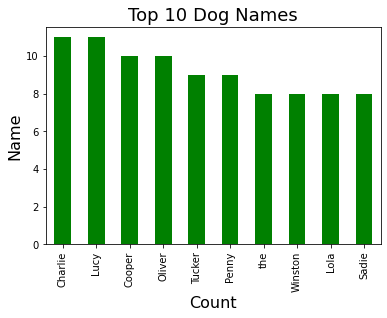

In [59]:
# Bar chart displaying the top 10 dog names
top_dog_name = tw_archive_clean.name.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_dog_name.plot(kind = 'bar', color=['Green'])
plt.title('Top 10 Dog Names', size=18)
plt.xlabel('Count', size=16)
plt.ylabel('Name', size=16)
plt.savefig('top-names.png');

Popularity of Dog Breeds

I was curious as to what the most popular dog breeds are in these tweets. Probably unsurprisingly, Labrador Retrievers are clearly the most popular. 

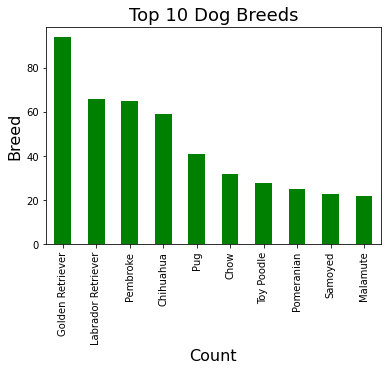

In [60]:
# Bar chart displaying the top 10 dog breeds
top_dog_breed = tw_archive_clean.breed.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_dog_breed.plot(kind = 'bar', color = ['Green'])
plt.title('Top 10 Dog Breeds', size=18)
plt.xlabel('Count', size=16)
plt.ylabel('Breed', size=16)
plt.savefig('top-breeds.png');

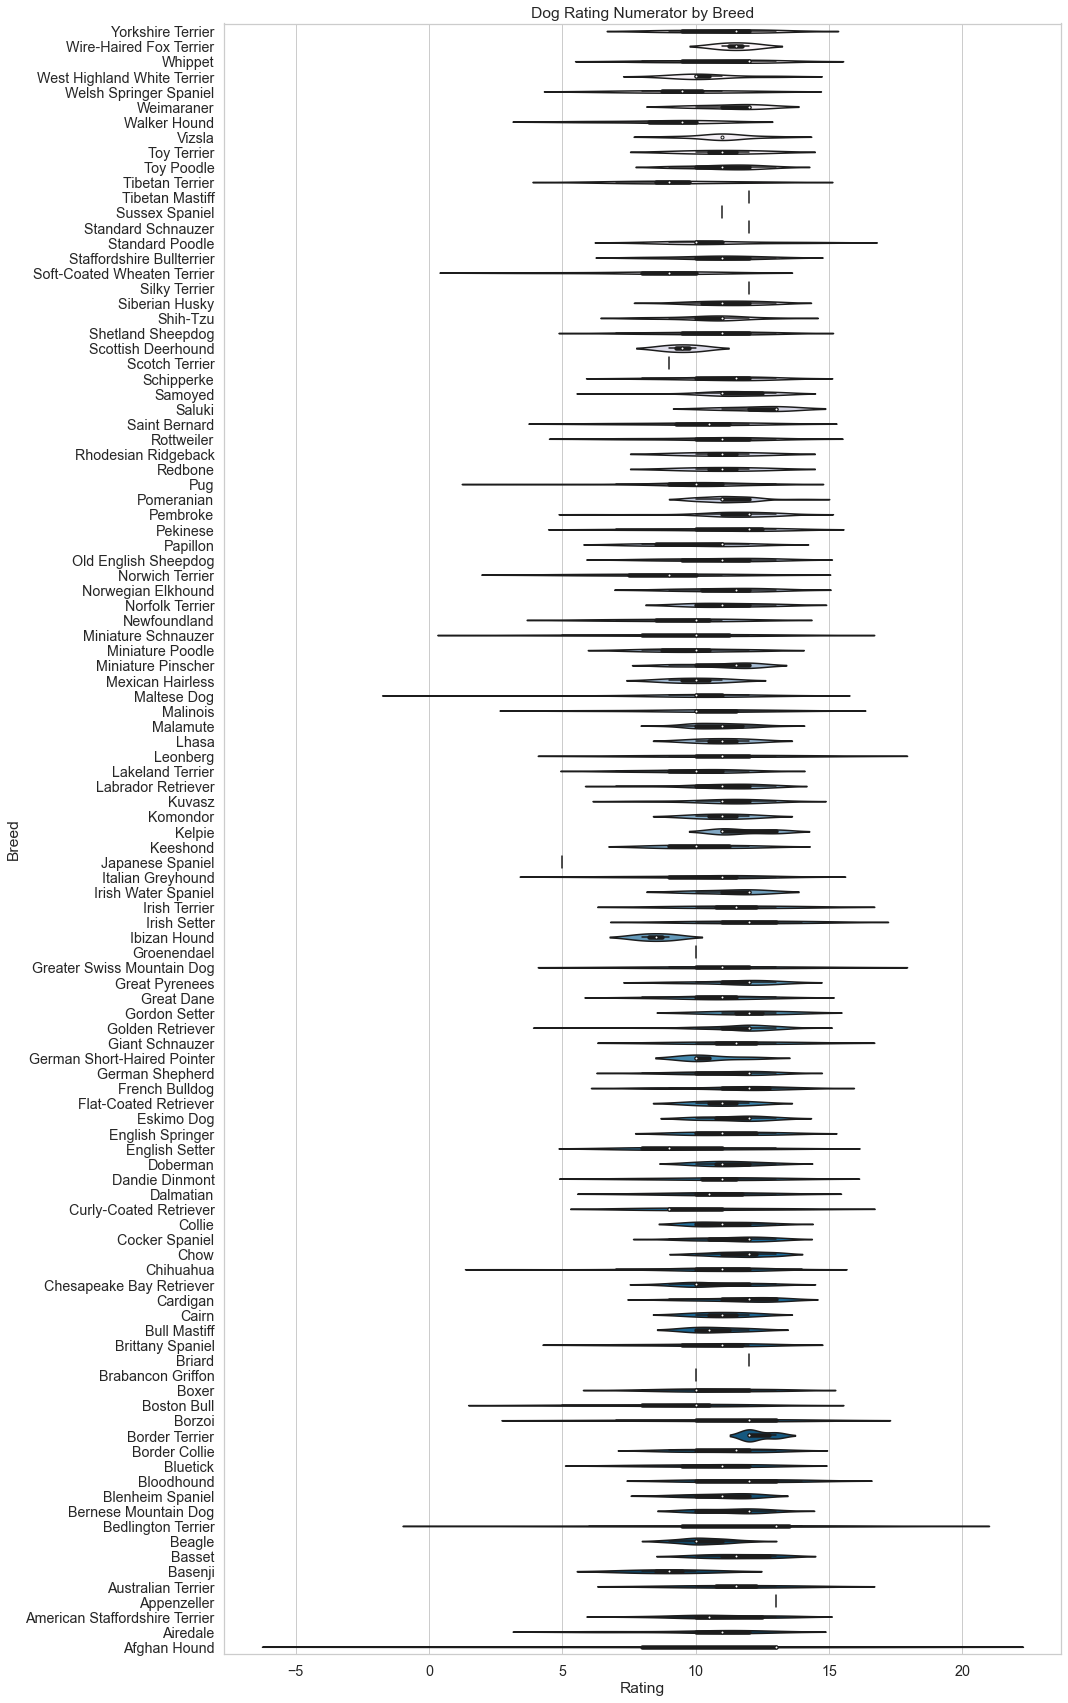

In [61]:
# violin chart showing the distribution of ratings by breed. 
# I thought this would be an interesting look at the rating disbursement.

sns.set(rc={'figure.figsize':(15,30)}, font_scale=1.3)

temp_df = tw_archive_clean[['breed', 'rating_numerator']]

my_order = tw_archive_clean.groupby(by=["breed"])["rating_numerator"].median().iloc[::-1].index


sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.rating_numerator,
                    y = temp_df.breed,
                    orient ="h",
                    palette = "PuBu",
                    order = my_order)

ax.set(xlabel='Rating',
       ylabel='Breed',
       title = 'Dog Rating Numerator by Breed')

plt.show()

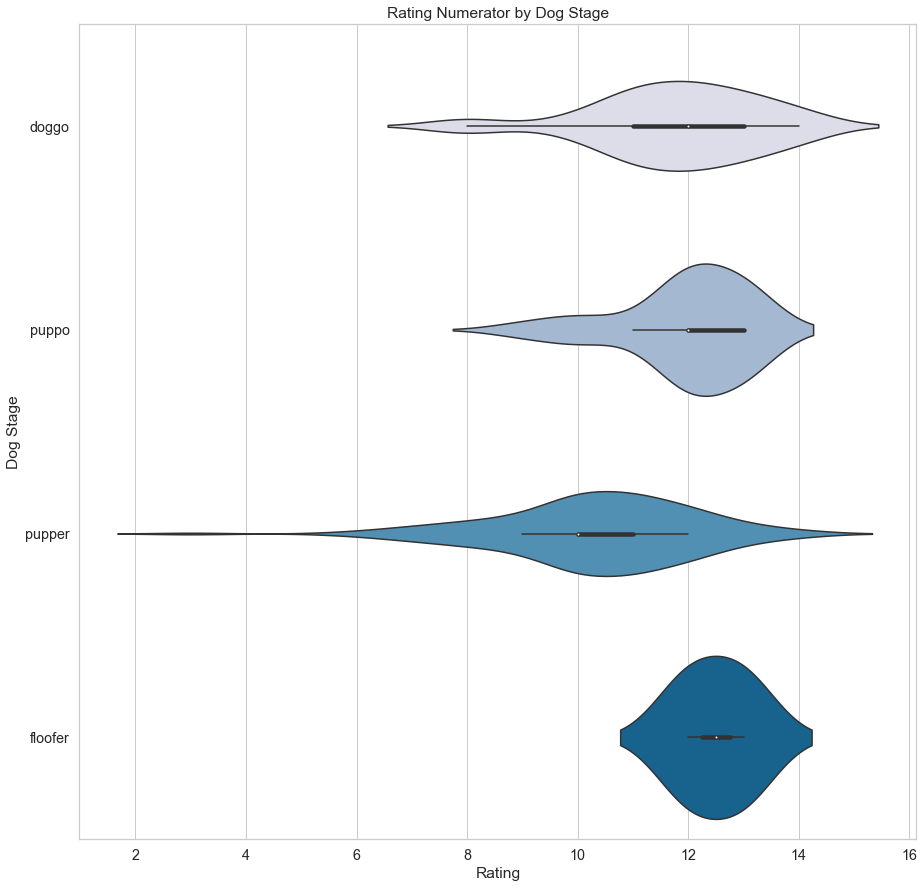

In [62]:
# violin chart showing the distribution of ratings by dog stage
# This one is more striking because of the fewer categories to compare

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = tw_archive_clean[["rating_numerator", "dog_stage"]]


sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.rating_numerator,
                    y = temp_df.dog_stage,
                    orient ="h",
                    palette = "PuBu")

ax.set(xlabel='Rating',
       ylabel='Dog Stage',
       title = 'Rating Numerator by Dog Stage')

plt.show()

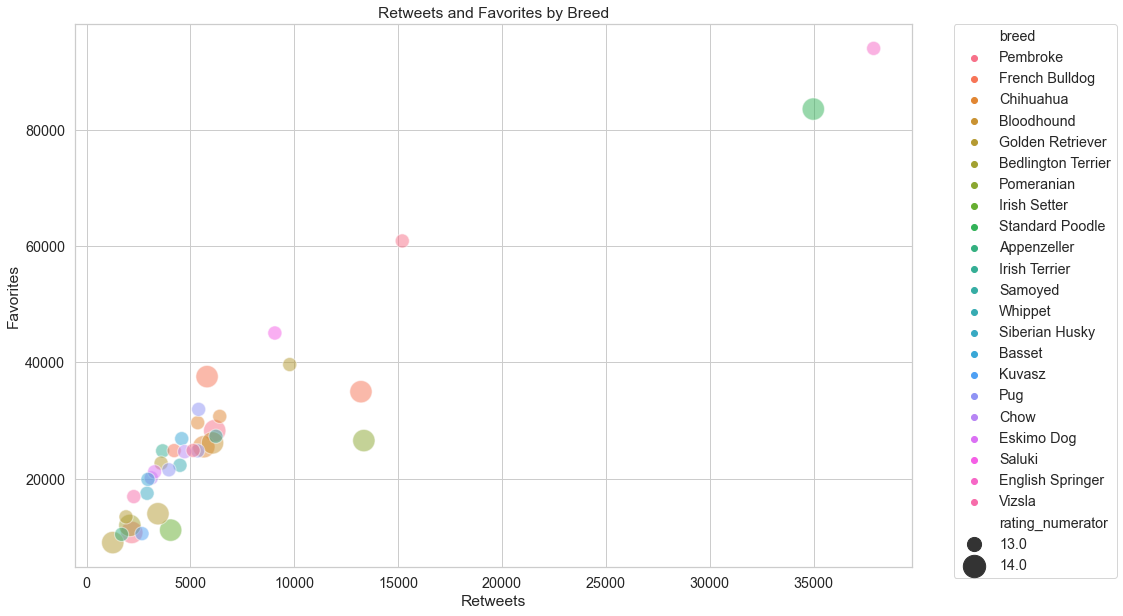

In [63]:
# This scatterplot is showing the retweets and favorites for each breed based on 
# rating_numerator. 

# set chart dimension
plt.figure(figsize=(15,10))

# set plotting style and source
sns.set_style('whitegrid')
sns.scatterplot(data = tw_archive_clean.nlargest(50, 'rating_numerator'),
                x = "retweet_count",
                y = "favorite_count",
                hue = "breed",
                size = 'rating_numerator',
                sizes = (200, 500),
                alpha = 0.5)                

# set title and labels
plt.title('Retweets and Favorites by Breed')
plt.xlabel('Retweets')
plt.ylabel('Favorites')

# move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);